#### Data is downloaded from kaggle

### This sheet involve following process:-

- Data Collection – Importing the dataset from CSV or source

- Data Integration – Merging or joining multiple datasets (if applicable)

- Data Cleaning – Handling missing values, correcting data types, removing duplicates

- Data Manipulation – Filtering, grouping, sorting, and reshaping the data

- Data Transformation – Scaling, encoding, or creating new features

- Feature Engineering – Creating new columns that may be helpful for ML

- Outlier Detection – Identifying extreme values that may skew results

- Descriptive Statistics – Showing mean, median, mode, skew, etc.

- Data Visualization – Exploring patterns through plots (histograms, boxplots, heatmaps, etc.)

- Exploratory Insights – Understanding trends, correlations, and distributions

- Data Exporting – Saving cleaned/transformed data for modeling or storage

In [413]:
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [415]:
data= pd.read_csv("../data/raw/Loan_default.csv")

In [416]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [417]:
data.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

### Data Cleaning

- ##### Handling Missing Values
- ##### Handling Duplicate Rows
- ##### Handling Outliers/Inaccurate Data

In [419]:
data.isnull().sum() #since no null values in any column move to check if there are any duplicates in LoadID

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [420]:
data.duplicated(subset=['LoanID']).sum()

0

In [421]:
data.duplicated().sum() #no duplicates in dataset data looks clean let's move further to our exploratory data analysis

0

In [422]:
data.shape

(255347, 18)

In [423]:
data.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [424]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [428]:
data.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [430]:
data.loc[255] #fetch and analize random row using label-based indexing method

LoanID             B3HP1RXJD2
Age                        33
Income                 140328
LoanAmount              69711
CreditScore               826
MonthsEmployed             49
NumCreditLines              2
InterestRate            23.01
LoanTerm                   48
DTIRatio                 0.75
Education         High School
EmploymentType     Unemployed
MaritalStatus         Married
HasMortgage                No
HasDependents             Yes
LoanPurpose              Auto
HasCoSigner                No
Default                     0
Name: 255, dtype: object

### Data Transformation – Scaling, encoding, or creating new features

In [432]:
#let's create some new columns using feature engineering:-

#shows whether loan is bigger then the income of applicant.
data['LoantoIncomeRatio'] = round(data['LoanAmount'] / data['Income'],2)

#shows an estimate of how much the borrower must pay every month. If it's a big chunk of income it can effect repayment capability.
data['MonthlyPayment'] = round(data['LoanAmount'] * (1 + (data['InterestRate'] / 100)) / data['LoanTerm'],2)

# shows how stable job score of a person
def employment_stability(row):
    score = row['MonthsEmployed']
    if row['EmploymentType'] == 'Full-time':
        score += 10
    elif row['EmploymentType'] == 'Part-time':
        score += 5
    elif row['EmploymentType'] == 'Unemployed':
        score -= 10
    return score

data['EmploymentStability'] = data.apply(employment_stability, axis=1)

#shows risky young borrowers with large loans
data['IsYoungHighLoan'] = ((data['Age']<25) & (data['LoanAmount']>150000)).astype(int)

#shows if person have dependent then it will increase chances of being default
data['IsSingleWithDependents'] = ((data['MaritalStatus'] == 'Single') & (data['HasDependents'] == 'Yes')).astype(int)

#shows if a person have co signer or with spuses might default less
data['HasFinancialSupport'] = ((data['HasCoSigner'] == 'Yes') | (data['MaritalStatus'] == 'Married')).astype(int)

#shows if Debt-to-Income ratio is over 0.5 often indicates risk of being default
data['HighDTI'] = (data['DTIRatio'] > 0.5).astype(int)

#shows if the person is using loan for which purpose and mark them Essential or Discretionary
def purpose_group(purpose):
    if purpose in ['Home', 'Education', 'Auto']:
        return 'Essential'
    else:
        return 'Discretionary'

data['LoanPurposeGroup'] = data['LoanPurpose'].apply(purpose_group)

data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasCoSigner,Default,LoantoIncomeRatio,MonthlyPayment,EmploymentStability,IsYoungHighLoan,IsSingleWithDependents,HasFinancialSupport,HighDTI,LoanPurposeGroup
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,Yes,0,0.59,1619.21,90,0,0,1,0,Discretionary
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,Yes,0,2.47,2173.76,25,0,0,1,1,Discretionary
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,No,1,1.53,6522.38,16,0,0,0,0,Essential
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,No,0,1.41,1998.60,10,0,0,1,0,Discretionary
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,No,0,0.45,202.79,-2,0,0,0,1,Essential


## Analysis for feature engineering

In [438]:
data["LoanPurpose"].unique()

array(['Other', 'Auto', 'Business', 'Home', 'Education'], dtype=object)

In [440]:
data['LoanAmount'].mean()

127578.86551242035

In [442]:
data['LoanAmount'].max()

249999

In [443]:
data['LoanAmount'].median()

127556.0

In [444]:
data['LoanAmount'].mode()

0     95419
1    133724
2    221949
Name: LoanAmount, dtype: int64

In [445]:
data['IsYoungHighLoan'].value_counts()

IsYoungHighLoan
0    241361
1     13986
Name: count, dtype: int64

### Let's see if there is any outlier

- #### Hanling outliers
- #### Inaccurate data

In [447]:
data.dtypes

LoanID                     object
Age                         int64
Income                      int64
LoanAmount                  int64
CreditScore                 int64
MonthsEmployed              int64
NumCreditLines              int64
InterestRate              float64
LoanTerm                    int64
DTIRatio                  float64
Education                  object
EmploymentType             object
MaritalStatus              object
HasMortgage                object
HasDependents              object
LoanPurpose                object
HasCoSigner                object
Default                     int64
LoantoIncomeRatio         float64
MonthlyPayment            float64
EmploymentStability         int64
IsYoungHighLoan             int32
IsSingleWithDependents      int32
HasFinancialSupport         int32
HighDTI                     int32
LoanPurposeGroup           object
dtype: object

In [521]:
numerical_cols = data[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio',
       'LoantoIncomeRatio', 'MonthlyPayment', 'EmploymentStability']]


In [449]:
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


Age: 0 outliers
Income: 0 outliers
LoanAmount: 0 outliers
CreditScore: 0 outliers
MonthsEmployed: 0 outliers
NumCreditLines: 0 outliers
InterestRate: 0 outliers
LoanTerm: 0 outliers
DTIRatio: 0 outliers
LoantoIncomeRatio: 19871 outliers
MonthlyPayment: 20507 outliers
EmploymentStability: 0 outliers


In [450]:
data[['LoantoIncomeRatio','MonthlyPayment']] #these two columns shows outliers let's visualize to see if they really are outliers.

,LoantoIncomeRatio,MonthlyPayment
0,0.59,1619.21
1,2.47,2173.76
2,1.53,6522.38
3,1.41,1998.60
4,0.45,202.79
...,...,...
255342,5.55,20034.10
255343,3.66,8826.35
255344,2.46,3655.21
255345,0.71,1525.73


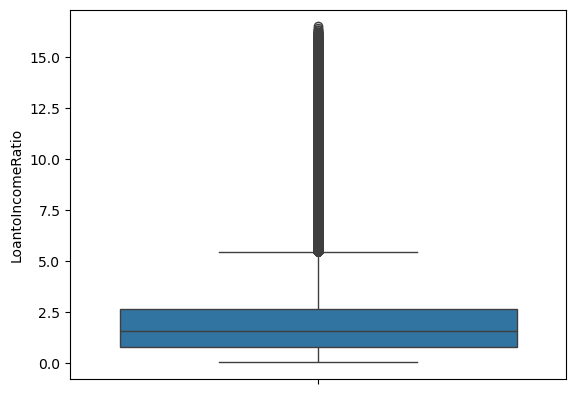

In [451]:
sns.boxplot(data = data['LoantoIncomeRatio'])
plt.show()

In [452]:
data['LoantoIncomeRatio'].describe(percentiles=[0.95, 0.99])


count    255347.000000
mean          2.177481
std           2.178361
min           0.030000
50%           1.550000
95%           6.730000
99%          10.980000
max          16.530000
Name: LoantoIncomeRatio, dtype: float64

In [453]:
cap = 10.98 # already computed above
data['LtI_cap'] = np.where(data['LoantoIncomeRatio'] > cap,cap,data['LoantoIncomeRatio'])

In [454]:
data['LtI_log'] = np.log1p(data['LtI_cap'])

In [455]:
data.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default',
       'LoantoIncomeRatio', 'MonthlyPayment', 'EmploymentStability',
       'IsYoungHighLoan', 'IsSingleWithDependents', 'HasFinancialSupport',
       'HighDTI', 'LoanPurposeGroup', 'LtI_cap', 'LtI_log'],
      dtype='object')

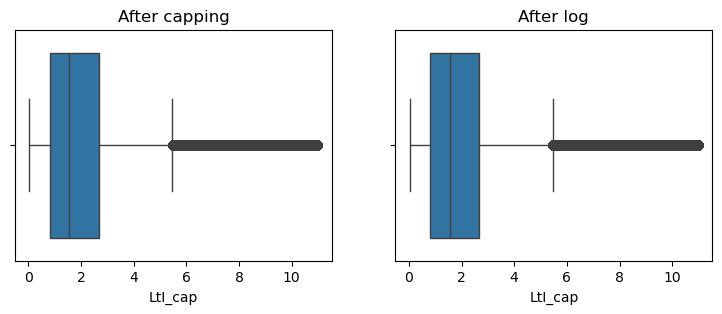

In [456]:
fig, ax = plt.subplots(1,2, figsize=(9,3))
sns.boxplot(x=data['LtI_cap'], ax=ax[0]); ax[0].set_title('After capping')
sns.boxplot(x=data['LtI_cap'], ax=ax[1]); ax[1].set_title('After log')
plt.show()

In [457]:
mask = data['LoantoIncomeRatio'] >= 14.0   # or 15, 14, whatever
cols = ['LoantoIncomeRatio', 'LtI_cap', 'LtI_log']
print(data.loc[mask, cols])

        LoantoIncomeRatio  LtI_cap   LtI_log
143                 14.19    10.98  2.483239
1161                15.54    10.98  2.483239
1351                14.06    10.98  2.483239
1791                14.25    10.98  2.483239
1962                14.81    10.98  2.483239
...                   ...      ...       ...
250818              14.25    10.98  2.483239
251265              14.10    10.98  2.483239
251994              14.00    10.98  2.483239
252545              14.42    10.98  2.483239
253470              15.21    10.98  2.483239

[450 rows x 3 columns]


In [458]:
data['LtI_log'].max()

2.4832385926873033

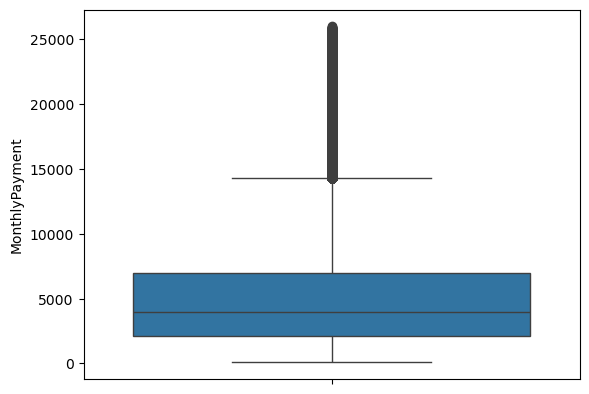

In [459]:
sns.boxplot(data['MonthlyPayment'])
plt.show()

In [460]:
data['MonthlyPayment'].describe(percentiles=[0.95, 0.99])

count    255347.000000
mean       5499.476363
std        5046.965573
min          86.460000
50%        3999.230000
95%       17778.348000
99%       22616.140200
max       26004.800000
Name: MonthlyPayment, dtype: float64

In [461]:
upper_cap = data['MonthlyPayment'].quantile(0.99)
data['MonthlyPayment'] = np.where(data['MonthlyPayment'] > upper_cap, upper_cap, data['MonthlyPayment'])

In [462]:
data['MonthlyPayment'].max()

22616.1402

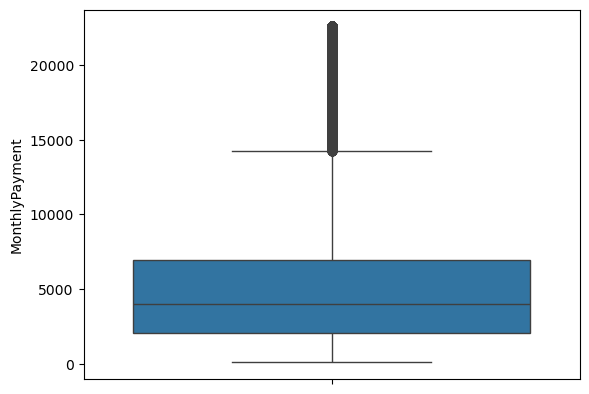

In [463]:
sns.boxplot(data['MonthlyPayment']) #after capping reduced 
plt.show()

In [501]:
print("Values above 99th percentile:", (data['MonthlyPayment'] > upper_cap).sum())

Values above 99th percentile: 0


In [510]:
print("Values above 99th percentile:", (data['LoantoIncomeRatio'] > cap).sum())

Values above 99th percentile: 0


### Correlation Matrix (Pearson Correlation)

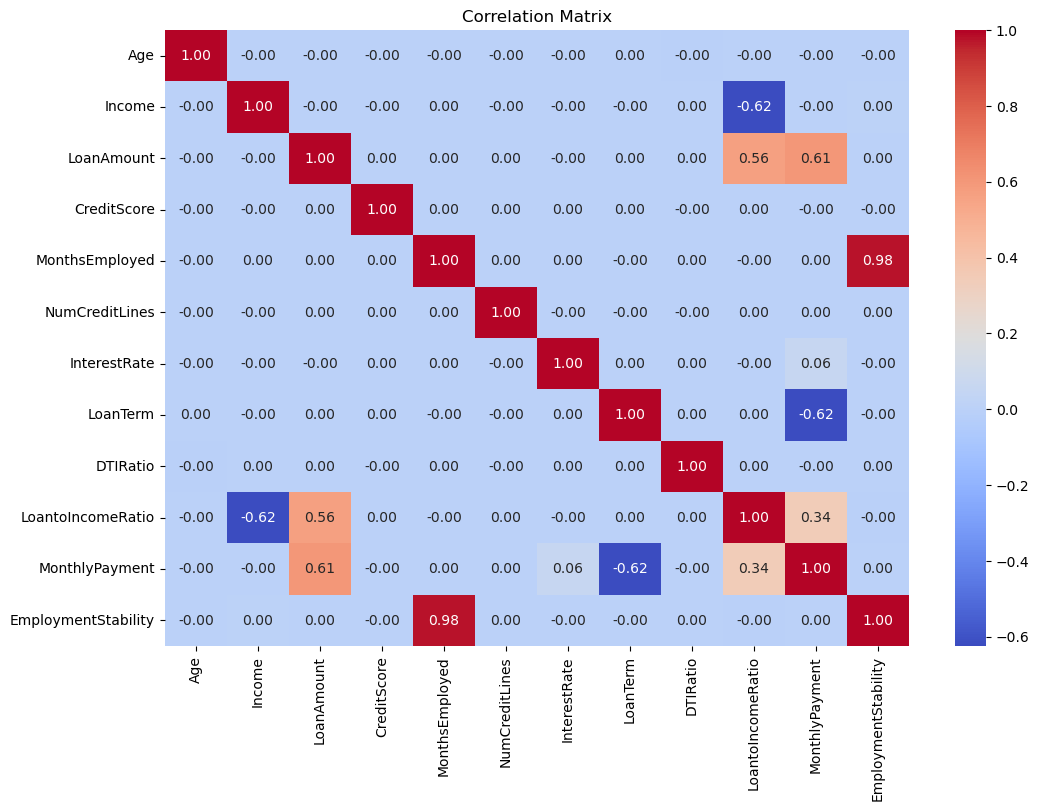

In [535]:
# Compute correlation matrix
corr_matrix = numerical_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [525]:
corr = data[['Age', 'MonthsEmployed', 'EmploymentStability']].corr()
print(corr)


                          Age  MonthsEmployed  EmploymentStability
Age                  1.000000       -0.000341            -0.000557
MonthsEmployed      -0.000341        1.000000             0.977981
EmploymentStability -0.000557        0.977981             1.000000


### Feature encoding on categorical data 

In [515]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,LoantoIncomeRatio,MonthlyPayment,EmploymentStability,IsYoungHighLoan,IsSingleWithDependents,HasFinancialSupport,HighDTI,LoanPurposeGroup,LtI_cap,LtI_log
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,0.59,1619.21,90,0,0,1,0,Discretionary,0.59,0.463734
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,2.47,2173.76,25,0,0,1,1,Discretionary,2.47,1.244155
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,1.53,6522.38,16,0,0,0,0,Essential,1.53,0.928219
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,1.41,1998.60,10,0,0,1,0,Discretionary,1.41,0.879627
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,0.45,202.79,-2,0,0,0,1,Essential,0.45,0.371564
